# BANA 8090 Special Topics in BANA - Final Project

<div class="alert-success">

Ashish Saxena <br>
saxenaas@mail.uc.edu <br>
Final Project <br>
Spring 2021 <br>
Due 4/21/2021 11:59 PM <br>
Special Topics in BANA<br>
BANA 8090
    
 </div>

## Overview

The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football.

## Dataset Details

The dataset contains World Cup statistics (summary, match-wise, player-wise) in three components.
1.	WorldCups - Dataset detailing season statistics along with winning summary
2.	WorldCupMatches - Dataset detailing match statistics for every season with participating teams and respective goals scored
3.	WorldCupPlayers - Dataset detailed event statistics by player for each match in every season with player information & position

Dataset Link: https://www.kaggle.com/abecklas/fifa-world-cup

## Importing, Combining, Transforming & Plotting

Datasets were downloaded from the source, unzipped and then imported as dataframes from their component csv files in the python environment. The function <i>read_csv</i> of the pandas library was used to import the respective datasets. Basic data quality checks (structure, null-values, duplicates, summary statistics) were conducted using built-in functions of python.

Visualizations were added whenever feasible using <i>matplotlib</i> library. For other advanced functions, <i>numpy</i> library was used. Additionally, <i>datetime</i> library was used for conversion of date strings into datetime format

## Exploratory Data Analysis and Results

For the exploratory data analysis, a total of 9 questions were used to analyse the data. Following were some of the key observations:
1.	Data for years 1942 and 1946 was observed to be unavailable in the dataset
2.	Brazil won the most world cups for the duration (5), followed by Italy (4) & Germany (4), which were followed by Argentina (2) and Uruguay (2)
3.	While the highest goals were scored in the seasons of 1998 (171) and 2014 (171), the highest goals scored by the winning team were scored by Germany in 1954 (25) with the highest percentage being scored by Uruguay in the year 1930 (21.42%)
4.	Of all the seasons played, the highest scorers were from the winning team only in the years of 1962, 1978, 1982, 2002, 2010
5.	Of all the seasons, 6 world cups were won by hosting nations
6.	The highest number of yellow/red cards were issued in 2006 (391) with Portugal being issued 28 of them
7.	While 100% of the penalties were converted to goals in the initial years, the accuracy began to tumble starting 2002 (76,47%) with the lowest being in the year 2010 (60%)
8.	Number of yellow cards issued in a match were observed to be moderately correlated with the number of goals scored with Pearson’s correlation coefficient being 0.76
9.	A total of 41 own goals were scored during all seasons with Bulgaria (2) scoring the highest ever by a team in a season
10.	In the final match of 2014, a total of 6 substitutions (3 on each side) were made during the match


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt

In [2]:
# Read datasets
cups = pd.read_csv('WorldCups.csv')
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')

In [3]:
# User-defined function for data quality check
def dataset_integrity_check(df):
    print(df.info())
    print(df.isna().sum())
    print(sum(df.duplicated()))
    print(df.describe())

In [4]:
# Dataset check - Cups
dataset_integrity_check(cups)
cups.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB
None
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64
0
              Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20.000000     

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [5]:
# Dataset check - Matches
dataset_integrity_check(matches)
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
# Dataset check - Players
dataset_integrity_check(players)
players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB
None
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64
736
            RoundID       MatchID  Shirt Number
count  3.778400e+04  3.778400e+04  37784.000000
mean   1.105647e+07  6.362233e+07     10.726

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
# Null value treatment & de-duplication

cups = cups.drop_duplicates().dropna(how = 'all')
matches = matches.drop_duplicates().dropna(how = 'all')
players = players.drop_duplicates().dropna(how = 'all')

print(len(cups))
print(len(matches))
print(len(players))

20
836
37048


In [8]:
np.unique(cups['Winner'])

array(['Argentina', 'Brazil', 'England', 'France', 'Germany',
       'Germany FR', 'Italy', 'Spain', 'Uruguay'], dtype=object)

In [9]:
# Data treatment - Standardization (Converting 'Germany FR' to 'Germany')
cups['Winner'] = np.where(cups['Winner'] == 'Germany FR', 'Germany', cups['Winner'])

### Q1. Which are the top 5 countries who have won the most number of FIFA World Cups?

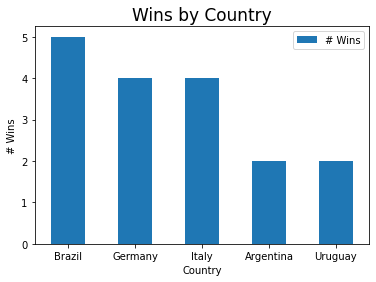

,Team,# Wins
1,Brazil,5
4,Germany,4
5,Italy,4
0,Argentina,2
7,Uruguay,2


In [10]:
top5 = cups.groupby(['Winner'], as_index = False).agg({"Year":"count"}).sort_values(['Year'], ascending = False)[0:5]
top5.columns = ['Team', '# Wins']
plot1 = top5.plot.bar(x='Team', y='# Wins', rot=0)
plot1.set_xlabel('Country')
plot1.set_ylabel('# Wins')
plot1.set_title('Wins by Country', fontsize = 17)
plt.show()
top5

### Q2. How many goals were scored each season? What percentage of total goals were scored by the winning team in each season?

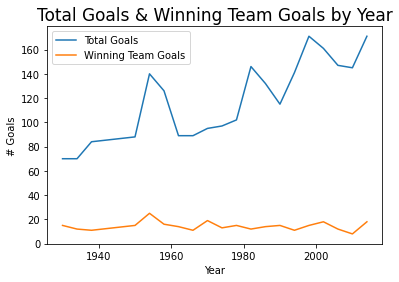

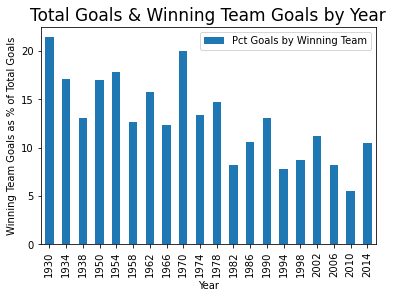

,Year,Total Goals,Team,Winning Team Goals,Pct Goals by Winning Team
0,1930,70,Uruguay,15.0,21.43
1,1934,70,Italy,12.0,17.14
2,1938,84,Italy,11.0,13.10
3,1950,88,Uruguay,15.0,17.05
4,1954,140,Germany,25.0,17.86
5,1958,126,Brazil,16.0,12.70
6,1962,89,Brazil,14.0,15.73
7,1966,89,England,11.0,12.36
8,1970,95,Brazil,19.0,20.00
9,1974,97,Germany,13.0,13.40


In [11]:
total_goals = cups[['Year', 'Winner', 'GoalsScored']]
total_goals.columns = ['Year', 'Team', 'Total Goals']

hteam_goals = matches[['Year', 'Home Team Name', 'Home Team Goals', 'RoundID', 'MatchID', 'Home Team Initials']]
hteam_goals.columns = ['Year', 'Team', 'Winning Team Goals', 'RoundID', 'MatchID', 'Team Initials']
ateam_goals = matches[['Year', 'Away Team Name', 'Away Team Goals', 'RoundID', 'MatchID', 'Away Team Initials']]
ateam_goals.columns = ['Year', 'Team', 'Winning Team Goals', 'RoundID', 'MatchID', 'Team Initials']
goals = hteam_goals.append(ateam_goals)

# Data treatment - Standardization (Converting 'Germany FR' to 'Germany')
goals['Team'] = np.where(goals['Team'] == 'Germany FR', 'Germany', goals['Team'])
goals_agg = goals.groupby(['Year', 'Team'], as_index = False).agg({"Winning Team Goals":"sum"})

final_goal_score = pd.merge(total_goals, goals_agg, how = 'left', on = ['Year', 'Team'])
final_goal_score['Pct Goals by Winning Team'] = np.round(final_goal_score['Winning Team Goals']/final_goal_score['Total Goals']*100,2)
plot2 = final_goal_score[['Year', 'Total Goals', 'Winning Team Goals']].plot.line(x = 'Year')
plot2.set_xlabel('Year')
plot2.set_ylabel('# Goals')
plot2.set_title('Total Goals & Winning Team Goals by Year', fontsize = 17)
plt.show()

plot3 = final_goal_score[['Year', 'Pct Goals by Winning Team']].plot.bar(x = 'Year')
plot3.set_xlabel('Year')
plot3.set_ylabel('Winning Team Goals as % of Total Goals')
plot3.set_title('Total Goals & Winning Team Goals by Year', fontsize = 17)
plt.show()

final_goal_score[['Year', 'Total Goals', 'Team', 'Winning Team Goals', 'Pct Goals by Winning Team']]

### Q3. Who were the top scoring players of each season? Were they from the winning team?

In [12]:
players['Count'] = players['Event'].str.count('G|W|P')
players_scored = players[players['Count']>0].groupby(['RoundID', 'MatchID', 'Player Name', 'Team Initials'], as_index = False).agg({"Count":"sum"})

scored = pd.merge(goals, players_scored, how = 'left', on = ['RoundID', 'MatchID', 'Team Initials'])
scored_agg = scored.groupby(['Year', 'Team', 'Player Name'], as_index = False).agg({"Count":"sum"})
scored_agg.columns = ['Year', 'Player Team', 'Player Name', 'Count']

scored_agg['Rank'] = scored_agg.groupby(['Year'], as_index=False)['Count'].rank("dense", ascending=False)
scored_max = scored_agg[scored_agg['Rank']==1]

top_scorers = pd.merge(final_goal_score, scored_max, how = 'outer', on = ['Year'])
top_scorers['IsWinningTeam'] = np.where(top_scorers['Team']==top_scorers['Player Team'], 'Yes', 'No')
top_scorers[['Year', 'Player Team', 'Player Name', 'Count', 'IsWinningTeam']]

,Year,Player Team,Player Name,Count,IsWinningTeam
0,1930,Argentina,Guillermo STABILE,8.0,No
1,1934,Czechoslovakia,Oldrich NEJEDLY,5.0,No
2,1938,Brazil,LEONIDAS,7.0,No
3,1950,Brazil,ADEMIR,8.0,No
4,1954,Hungary,Sandor KOCSIS,11.0,No
5,1958,France,Just FONTAINE,13.0,No
6,1962,Brazil,GARRINCHA,4.0,Yes
7,1962,Brazil,VAVA,4.0,Yes
8,1962,Chile,Leonel SANCHEZ,4.0,No
9,1962,Hungary,Florian ALBERT,4.0,No


### Q4. How many times did the host country win the world cup?

In [13]:
print(len(cups[cups['Country']==cups['Winner']]))

6


### Q5. How many cards (Red/Yellow) were issued in each season? Which team was issued the highest no. of cards in a season?

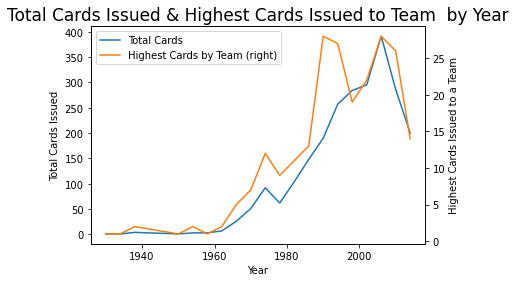

,Year,Total Cards,Player Team,Highest Cards by Team
0,1930.0,1.0,Peru,1.0
1,1934.0,1.0,Hungary,1.0
2,1938.0,4.0,Brazil,2.0
3,1950.0,1.0,Brazil,1.0
4,1954.0,3.0,Brazil,2.0
5,1958.0,3.0,Czechoslovakia,1.0
6,1958.0,3.0,Germany,1.0
7,1958.0,3.0,Hungary,1.0
8,1962.0,7.0,Italy,2.0
9,1966.0,26.0,Argentina,5.0


In [14]:
players['Cards'] = players['Event'].str.count('R|Y|RSY')
players_fined = players[players['Cards']>0].groupby(['RoundID', 'MatchID', 'Team Initials'], as_index = False).agg({"Cards":"sum"})

fined = pd.merge(goals, players_fined, how = 'left', on = ['RoundID', 'MatchID', 'Team Initials'])
fined_agg = fined.groupby(['Year', 'Team'], as_index = False).agg({"Cards":"sum"})
fined_agg.columns = ['Year', 'Player Team', 'Highest Cards by Team']

fined_agg['Rank'] = fined_agg.groupby(['Year'], as_index=False)['Highest Cards by Team'].rank("dense", ascending=False)
fined_max = fined_agg[fined_agg['Rank']==1]

final_fine_score = fined_agg.groupby(['Year'], as_index = False).agg({"Highest Cards by Team":"sum"})
final_fine_score.columns = ['Year','Total Cards']

top_fined = pd.merge(final_fine_score, fined_max, how = 'outer', on = ['Year'])
# top_scorers['IsWinningTeam'] = np.where(top_scorers['Team']==top_scorers['Player Team'], 'Yes', 'No')

plot4 = top_fined[['Year', 'Total Cards', 'Highest Cards by Team']].plot.line(x = 'Year', secondary_y = 'Highest Cards by Team')
plot4.set_xlabel('Year')
plot4.set_ylabel('Total Cards Issued')
plot4.right_ax.set_ylabel('Highest Cards Issued to a Team')
plot4.set_title('Total Cards Issued & Highest Cards Issued to Team  by Year', fontsize = 17)
plt.show()
top_fined[['Year', 'Total Cards', 'Player Team', 'Highest Cards by Team']]

### Q6. How many penalties were taken in each season? What percentage of penalties were successful?

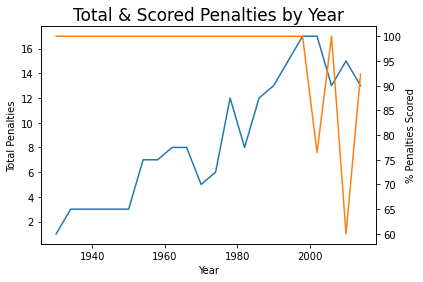

,Year,Penalties,Penalties Scored,Perc Scored
0,1930.0,1.0,1.0,100.00
1,1934.0,3.0,3.0,100.00
2,1938.0,3.0,3.0,100.00
3,1950.0,3.0,3.0,100.00
4,1954.0,7.0,7.0,100.00
5,1958.0,7.0,7.0,100.00
6,1962.0,8.0,8.0,100.00
7,1966.0,8.0,8.0,100.00
8,1970.0,5.0,5.0,100.00
9,1974.0,6.0,6.0,100.00


In [15]:
players['Penalties'] = players['Event'].str.count('P')
players['Penalties Scored'] = players['Penalties'] - players['Event'].str.count('MP')

penalties = players[players['Penalties']>0].groupby(['RoundID', 'MatchID', 'Team Initials'], as_index = False).agg({"Penalties":"sum", "Penalties Scored":"sum"})

penalties_scored = pd.merge(goals, penalties, how = 'left', on = ['RoundID', 'MatchID', 'Team Initials'])

final_penalties_scored = penalties_scored.groupby(['Year'], as_index = False).agg({"Penalties":"sum", "Penalties Scored":"sum"})
final_penalties_scored['Perc Scored'] = np.round(final_penalties_scored['Penalties Scored']/final_penalties_scored['Penalties']*100,2)
plot5 = final_penalties_scored[['Year', 'Penalties','Perc Scored']].plot.line(x = 'Year', secondary_y = 'Perc Scored', legend=False)
plot5.set_xlabel('Year')
plot5.set_ylabel('Total Penalties')
plot5.right_ax.set_ylabel('% Penalties Scored')
plot5.set_title('Total & Scored Penalties by Year', fontsize = 17)
plt.show()

final_penalties_scored

### Q7. Is there any correlation between number of yellow cards issued to a team in a match with the number of goals scored by the team in that match?

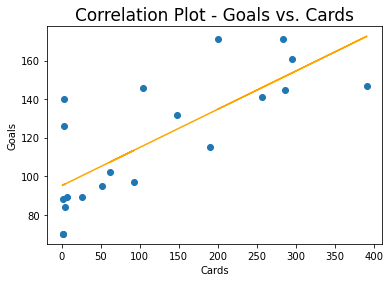

,Cards,Goals
Cards,1.000000,0.760496
Goals,0.760496,1.000000


In [16]:
card_vs_goals = pd.merge(goals, players_fined, how = 'left', on = ['RoundID', 'MatchID', 'Team Initials'])
card_vs_goals.columns = ['Year', 'Team', 'Goals', 'RoundID', 'MatchID', 'Team Initials', 'Cards']
card_vs_goals_agg = card_vs_goals.groupby(['Year'], as_index = False).agg({"Cards":"sum", "Goals":"sum"})

card_vs_goals_agg[['Cards', 'Goals']].plot.scatter(x = 'Cards', y = 'Goals')
plt.scatter(card_vs_goals_agg['Cards'], card_vs_goals_agg['Goals'])

z = np.polyfit(card_vs_goals_agg['Cards'], card_vs_goals_agg['Goals'], 1)
p = np.poly1d(z)
plt.plot(card_vs_goals_agg['Cards'],p(card_vs_goals_agg['Cards']),"orange")
plt.title('Correlation Plot - Goals vs. Cards', fontsize = 17)
plt.show()

card_vs_goals_agg[['Cards', 'Goals']].corr()

### Q8. How many own goals were scored in all seasons? Of the teams that scored own goals, which team scored the highest?

In [17]:
players['Own Goals'] = players['Event'].str.count('W')

own_goals = players[players['Own Goals']>0].groupby(['RoundID', 'MatchID', 'Team Initials'], as_index = False).agg({"Own Goals":"sum"})
own_goals_scored = pd.merge(goals, own_goals, how = 'left', on = ['RoundID', 'MatchID', 'Team Initials'])
own_goals_scored_agg = own_goals_scored[own_goals_scored['Own Goals']>0].groupby(['Year', 'Team'], as_index = False).agg({"Own Goals":"sum"})
print(sum(own_goals_scored_agg['Own Goals']))
own_goals_scored_agg.sort_values(['Own Goals'], ascending = False)[0:1]


41.0


,Year,Team,Own Goals
8,1966.0,Bulgaria,2.0


### Q9. For the final match of 2014, how many substitutions were made from each of the playing teams?

In [18]:
matches_14 = matches[matches['Year']==2014]
matches_14['Datetime'] = matches_14['Datetime'].apply(lambda x: dt.strptime(x, '%d %b %Y - %H:%M '))
final_match = matches_14[matches_14['Datetime'] == matches_14['Datetime'].max()]

final_match_creds = final_match[['Year', 'RoundID', 'MatchID']]

final_match_details = pd.merge(goals, final_match_creds, how = 'inner', on = ['Year', 'RoundID', 'MatchID'])

final_match_events = pd.merge(players, final_match_details, how = 'inner', on = ['RoundID', 'MatchID', 'Team Initials'])

final_match_events['Substitution'] = final_match_events['Event'].str.count('O')
final_match_substitutions = final_match_events.groupby(['Team'], as_index = False).agg({"Substitution":"sum"})
final_match_substitutions

<ipython-input-18-e600ca5a7421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_14['Datetime'] = matches_14['Datetime'].apply(lambda x: dt.strptime(x, '%d %b %Y - %H:%M '))


,Team,Substitution
0,Argentina,3.0
1,Germany,3.0
